In [57]:
# Import packages

import os
import numpy as np
import math as math
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors


In [102]:
# Define constants:
m = 1 # mass
k = 1 # spring constant
dt = 0.055
nsteps = 200 # max number of steps

# Define initial conditions:
x_0 = 0.5 # initial displacement
v_0 = 0 # initial velocity


In [103]:
# creating empty arrays
# as the integration is carried out, values with be appended to these arrays 

t_vals = np.zeros(nsteps)

# for explicit
x_exp = np.zeros(nsteps)
x_exp[0] = x_0 # set initial value
v_exp = np.zeros(nsteps)
v_exp[0] = v_0 # set initial value

# for symplectic
x_symp = np.zeros(nsteps)
x_symp[0] = x_0 # set initial value
v_symp = np.zeros(nsteps)
v_symp[0] = v_0 # set initial value


In [104]:
# to calculate total energy, use E = T + U
def energy(x_vals, v_vals):
    T = 0.5 * m * v_vals**2
    U = 0.5 * k * x_vals**2
    return T + U

# now use Euler's method to obtain position and velocity values 
# F = ma = -kx
# acceleration: a = -(k/m)*x
# velocity = v0 + at
# position = x0 + vt

In [105]:
# explicit method:
# v_(n+1) = v_n + a*dt
# x_(n+1) = x_n + v_*dt
def euler_exp():
    for i in range(nsteps-1):
        a = -(k/m) * x_exp[i] # define acceleration from force equation
        v_exp[i+1] = v_exp[i] + a*dt
        x_exp[i+1] = x_exp[i] + v_exp[i]*dt
        t_vals[i+1] = t_vals[i] + dt

In [106]:
# symplectic method:
# v_(n+1) = v_n + a*dt
# x_(n+1) = x_n + v_(n+1)*dt
def euler_symp():
    for i in range(nsteps-1):
        a = -(k/m) * x_symp[i] # define acceleration from force equation
        v_symp[i+1] = v_symp[i] + a * dt # symplectic velocity eqn as shown above
        x_symp[i+1] = x_symp[i] + v_symp[i+1] * dt # symplectic position eqn as shown above


In [107]:
# perform integration
euler_exp()
euler_symp()

# calculate the energies
E_symp = energy(x_symp, v_symp)
E_exp = energy(x_exp, v_exp)

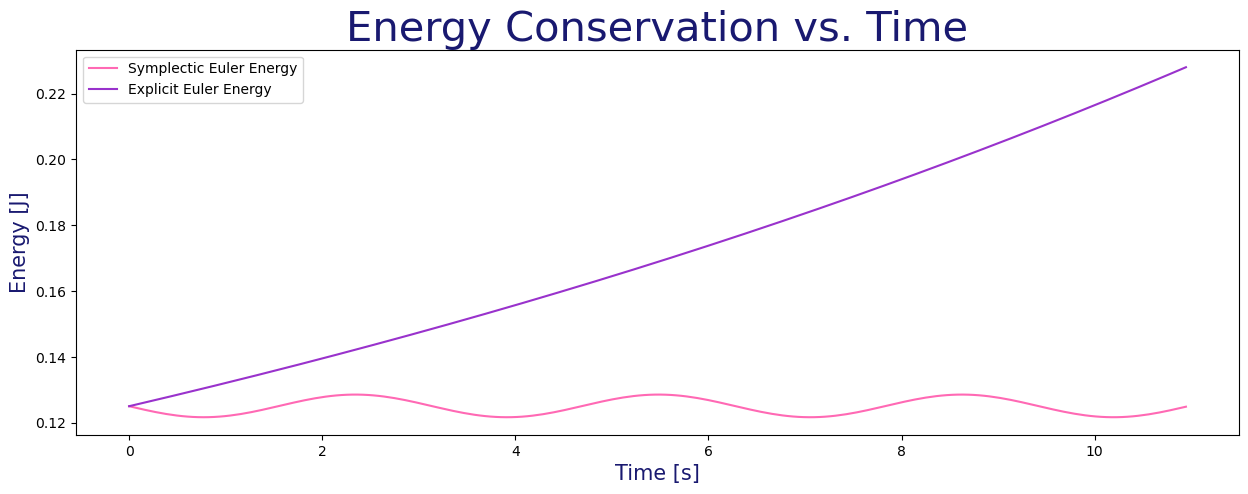

In [110]:
# plot energy vs. time
plt.figure(figsize=(15,5))
plt.plot(t_vals, E_symp, label="Symplectic Euler Energy", color="hotpink")
plt.plot(t_vals, E_exp, label="Explicit Euler Energy", color="darkorchid")
plt.xlabel("Time [s]", fontsize=15, color="midnightblue")
plt.ylabel("Energy [J]", fontsize=15, color="midnightblue")
plt.title("Energy Conservation vs. Time", fontsize=30, color="midnightblue")
plt.legend()
plt.show()

For explicit Euler's method, energy is not conserved. 

For symplectic, there should be some conserved quantity.
In this case, there is an oscillation around the standard Hamiltonian or true value. 

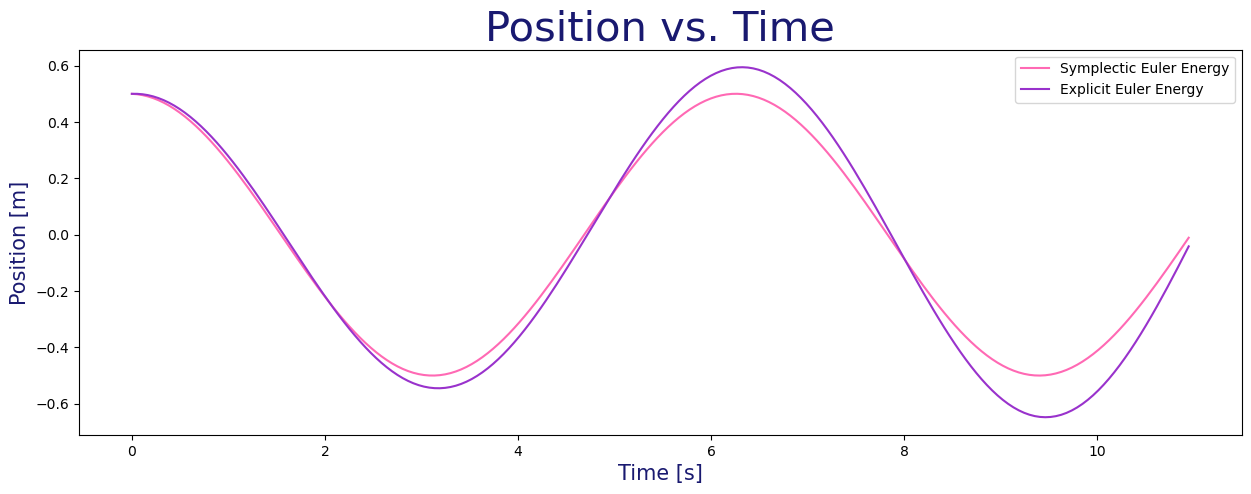

In [111]:
# plot position vs. time
plt.figure(figsize=(15,5))
plt.plot(t_vals, x_symp, label="Symplectic Euler Energy", color="hotpink")
plt.plot(t_vals, x_exp, label="Explicit Euler Energy", color="darkorchid")
plt.xlabel("Time [s]", fontsize=15, color="midnightblue")
plt.ylabel("Position [m]", fontsize=15, color="midnightblue")
plt.title("Position vs. Time", fontsize=30, color="midnightblue")
plt.legend()
plt.show()